## McDonald's Menu Item Type Prediction

Given *data about McDonald's menu items*, let's try to predict the **type** of a given item. 

We will use a TensorFlow ANN with two inputs to make our predictions. 

Data source: https://www.kaggle.com/datasets/mcdonalds/nutrition-facts

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

2025-03-01 17:33:02.200039: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv("menu.csv")
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

### Encoding Label Column

In [4]:
data['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [6]:
label_encoder = LabelEncoder()

data['Category'] = label_encoder.fit_transform(data['Category'])

In [7]:
label_mappings = dict(enumerate(label_encoder.classes_))
label_mappings

{0: 'Beef & Pork',
 1: 'Beverages',
 2: 'Breakfast',
 3: 'Chicken & Fish',
 4: 'Coffee & Tea',
 5: 'Desserts',
 6: 'Salads',
 7: 'Smoothies & Shakes',
 8: 'Snacks & Sides'}

### Encoding Item Column

In [8]:
names = data['Item'].copy()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(names)

names = tokenizer.texts_to_sequences(names)

In [9]:
names

[[8, 52],
 [8, 113, 114],
 [18, 52],
 [18, 52, 2, 8],
 [18, 52, 2, 8, 24],
 [70, 8, 52],
 [14, 8, 19, 6, 20, 6],
 [14, 8, 19, 6, 1, 6],
 [14, 8, 19, 6, 2, 8, 24, 20, 6],
 [14, 8, 19, 6, 2, 8, 24, 1, 6],
 [18, 6, 20, 6],
 [18, 6, 1, 6],
 [18, 6, 2, 8, 20, 6],
 [18, 6, 2, 8, 1, 6],
 [18, 6, 2, 8, 24, 20, 6],
 [18, 6, 2, 8, 24, 1, 6],
 [71, 72, 5, 6, 20, 6],
 [71, 72, 5, 6, 1, 6],
 [70, 8, 6, 20, 6],
 [14, 8, 19, 53],
 [14, 8, 19, 53, 2, 8, 24],
 [18, 53],
 [18, 8, 19, 53],
 [18, 8, 19, 53, 2, 8, 24],
 [14, 8, 19, 73],
 [14, 8, 19, 73, 2, 8, 24],
 [70, 8, 19, 73],
 [30, 37, 20, 6],
 [30, 37, 1, 6],
 [30, 37, 2, 8, 24, 20, 6],
 [30, 37, 2, 8, 24, 1, 6],
 [30, 37, 2, 48, 20, 6],
 [30, 37, 2, 48, 1, 6],
 [30, 37, 2, 48, 74, 8, 24, 20, 6],
 [30, 37, 2, 48, 74, 8, 24, 1, 6],
 [48],
 [48, 74, 18],
 [18, 115],
 [116, 92],
 [117, 118],
 [75, 93, 76],
 [75, 93, 76, 77, 92, 28],
 [30, 119],
 [54, 55, 2, 19],
 [54, 55, 2, 14, 19],
 [54, 55, 2, 14, 120, 25],
 [54, 55, 121],
 [59, 54, 55, 2, 19],
 [12

In [10]:
tokenizer.word_index

{'large': 1,
 'with': 2,
 'medium': 3,
 'small': 4,
 'chicken': 5,
 'biscuit': 6,
 'iced': 7,
 'egg': 8,
 'latte': 9,
 'nonfat': 10,
 'mocha': 11,
 'caramel': 12,
 'french': 13,
 'bacon': 14,
 'vanilla': 15,
 'premium': 16,
 'coffee': 17,
 'sausage': 18,
 'cheese': 19,
 'regular': 20,
 'crispy': 21,
 'chocolate': 22,
 'grilled': 23,
 'whites': 24,
 'ranch': 25,
 'milk': 26,
 'shake': 27,
 'sugar': 28,
 'free': 29,
 'big': 30,
 'sandwich': 31,
 'snack': 32,
 'hazelnut': 33,
 'syrup': 34,
 'frappé': 35,
 'smoothie': 36,
 'breakfast': 37,
 'mcwrap': 38,
 'hot': 39,
 'diet': 40,
 'dr': 41,
 'pepper': 42,
 'tea': 43,
 'mcflurry': 44,
 'salad': 45,
 'strawberry': 46,
 'child': 47,
 'hotcakes': 48,
 'classic': 49,
 'sweet': 50,
 'wrap': 51,
 'mcmuffin': 52,
 'mcgriddles': 53,
 'quarter': 54,
 'pounder': 55,
 'southwest': 56,
 'mcnuggets': 57,
 'piece': 58,
 'double': 59,
 'mcchicken': 60,
 'fries': 61,
 'chip': 62,
 'coca': 63,
 'cola': 64,
 'coke': 65,
 'sprite': 66,
 'minute': 67,
 'maid': 

In [11]:
vocab_length = len(tokenizer.word_index) + 1

max_seq_length = np.max(list(map(lambda x: len(x), names)))

print("Vocabulary Length:", vocab_length)
print("Max Sequence Length:", max_seq_length)

Vocabulary Length: 155
Max Sequence Length: 9


In [12]:
names = pad_sequences(names, maxlen=max_seq_length, padding='post')
names

array([[  8,  52,   0, ...,   0,   0,   0],
       [  8, 113, 114, ...,   0,   0,   0],
       [ 18,  52,   0, ...,   0,   0,   0],
       ...,
       [ 44,   2,  90, ...,   0,   0,   0],
       [ 44,   2, 109, ...,   3,   0,   0],
       [ 44,   2, 109, ...,  32,   0,   0]], dtype=int32)

In [13]:
data = data.drop('Item', axis=1)

### Cleaning Service Size Features

In [14]:
data.head()

,Category,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,2,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,2,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,2,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,2,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,2,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [15]:
data['Serving Size']

0       4.8 oz (136 g)
1       4.8 oz (135 g)
2       3.9 oz (111 g)
3       5.7 oz (161 g)
4       5.7 oz (161 g)
            ...       
255    10.1 oz (285 g)
256    13.4 oz (381 g)
257     6.7 oz (190 g)
258    14.2 oz (403 g)
259     7.1 oz (202 g)
Name: Serving Size, Length: 260, dtype: object

In [16]:
data['Serving Size'].unique()

array(['4.8 oz (136 g)', '4.8 oz (135 g)', '3.9 oz (111 g)',
       '5.7 oz (161 g)', '6.5 oz (185 g)', '5.3 oz (150 g)',
       '5.8 oz (164 g)', '5.4 oz (153 g)', '5.9 oz (167 g)',
       '4.1 oz (117 g)', '4.6 oz (131 g)', '5.7 oz (163 g)',
       '6.2 oz (177 g)', '6.4 oz (181 g)', '5 oz (143 g)',
       '5.5 oz (157 g)', '7.1 oz (201 g)', '6.1 oz (174 g)',
       '6.3 oz (178 g)', '5 oz (141 g)', '7.2 oz (205 g)',
       '6.9 oz (197 g)', '8.5 oz (241 g)', '9.5 oz (269 g)',
       '10 oz (283 g)', '9.6 oz (272 g)', '10.1 oz (286 g)',
       '14.8 oz (420 g)', '15.3 oz (434 g)', '14.9 oz (423 g)',
       '15.4 oz (437 g)', '5.3 oz (151 g)', '6.8 oz (192 g)',
       '2 oz (56 g)', '4 oz (114 g)', '9.6 oz (251 g)', '7.4 oz (211 g)',
       '7.1 oz (202 g)', '8 oz (227 g)', '8.3 oz (235 g)',
       '8.6 oz (244 g)', '3.5 oz (98 g)', '4 oz (113 g)',
       '9.5 oz (270 g)', '5.2 oz (147 g)', '6.7 oz (190 g)',
       '5.6 oz (159 g)', '7.3 oz (208 g)', '7.5 oz (213 g)',
       '7 oz (20

In [21]:
units = []

def get_grams(serving):
    units.append(0)
    return float(re.search(r'(?<=\()[\d]+', serving).group(0))

def get_ml(serving):
    units.append(1)
    return float(re.search(r'(?<=\()[\d]+', serving).group(0))
    
def get_fl_oz(serving):
    units.append(2)
    return float(re.search(r'^[\d.]+', serving).group(0))

In [22]:
def get_units(serving):
    if ' g)' in serving:
        return get_grams(serving)
    elif ' ml)' in serving:
        return get_ml(serving)
    else:
        return get_fl_oz(serving)

In [23]:
data.head()

,Category,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,2,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,2,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,2,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,2,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,2,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [24]:
data['Serving Size'] = data['Serving Size'].apply(get_units)
data['Serving Units'] = units

In [32]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [33]:
data = onehot_encode(data, 'Serving Units', 'units')

In [34]:
data

,Category,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),units_0,units_1,units_2
0,2,136.0,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15,True,False,False
1,2,135.0,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8,True,False,False
2,2,111.0,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10,True,False,False
3,2,161.0,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15,True,False,False
4,2,161.0,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,7,285.0,510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8,True,False,False
256,7,381.0,690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10,True,False,False
257,7,190.0,340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6,True,False,False
258,7,403.0,810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6,True,False,False


### Splitting/Scaling

In [36]:
y = data['Category'].copy()
X = data.drop('Category', axis=1).copy()

In [37]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [38]:
names_train, names_test, X_train, X_test, y_train, y_test = train_test_split(names, X, y, train_size=0.7)

### Modelling

In [39]:
num_classes = len(y.unique())
print("Number of classes: ", num_classes)

name_feature_length = names.shape[1]
print("Name feature length:", name_feature_length)

other_feature_length = X.shape[1]
print("Other feature length: ", other_feature_length)

Number of classes:  9
Name feature length: 9
Other feature length:  25


In [41]:
# Name features
name_input = tf.keras.Input(shape=(name_feature_length,), name='name_input')

name_embedding = tf.keras.layers.Embedding(
    input_dim=vocab_length,
    output_dim=64,
    input_length=name_feature_length,
    name='name_embedding'
)(name_input)

name_flatten = tf.keras.layers.Flatten(name='name_flatten')(name_embedding)

# Other features
other_input = tf.keras.Input(shape=(other_feature_length,), name='other_input')

dense_1 = tf.keras.layers.Dense(64, activation='relu', name='dense_1')(other_input)

dense_2 = tf.keras.layers.Dense(64, activation='relu', name='dense_2')(dense_1)

# Combined features
concat = tf.keras.layers.concatenate([name_flatten, dense_2], name='concatenate')

outputs = tf.keras.layers.Dense(num_classes, activation='softmax', name='output_layer')(concat)

# Create Model
model = tf.keras.Model(inputs=[name_input, other_input], outputs=outputs)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 name_input (InputLayer)        [(None, 9)]          0           []                               
                                                                                                  
 other_input (InputLayer)       [(None, 25)]         0           []                               
                                                                                                  
 name_embedding (Embedding)     (None, 9, 64)        9920        ['name_input[0][0]']             
                                                                                                  
 dense_1 (Dense)                (None, 64)           1664        ['other_input[0][0]']            
                                                                                              

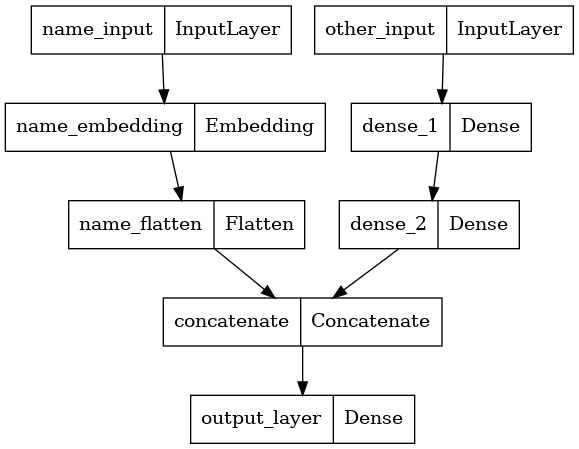

In [44]:
print(model.summary())
tf.keras.utils.plot_model(model)

### Training

In [45]:
batch_size=32
epochs=100

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    [names_train, X_train],
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
5/5 [==============================] - 2s 103ms/step - loss: 2.2126 - accuracy: 0.0966 - val_loss: 2.0708 - val_accuracy: 0.5946 - lr: 0.0010
Epoch 2/100
5/5 [==============================] - 0s 22ms/step - loss: 2.0359 - accuracy: 0.5172 - val_loss: 1.9051 - val_accuracy: 0.6216 - lr: 0.0010
Epoch 3/100
5/5 [==============================] - 0s 24ms/step - loss: 1.8718 - accuracy: 0.5103 - val_loss: 1.7419 - val_accuracy: 0.6216 - lr: 0.0010
Epoch 4/100
5/5 [==============================] - 0s 22ms/step - loss: 1.7140 - accuracy: 0.5379 - val_loss: 1.5759 - val_accuracy: 0.6216 - lr: 0.0010
Epoch 5/100
5/5 [==============================] - 0s 38ms/step - loss: 1.5574 - accuracy: 0.5862 - val_loss: 1.4189 - val_accuracy: 0.6216 - lr: 0.0010
Epoch 6/100
5/5 [==============================] - 0s 31ms/step - loss: 1.4125 - accuracy: 0.5931 - val_loss: 1.2811 - val_accuracy: 0.6216 - lr: 0.0010
Epoch 7/100
5/5 [==============================] - 0s 31ms/step - loss: 1.2821 - 

### Results

In [46]:
results = model.evaluate([names_test, X_test], y_test, verbose=0)
print("Model Accuracy: ", results[1])

Model Accuracy:  0.9487179517745972
